In [ ]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
# transform labels to int type
y_train=y_train.astype(int)
y_test=y_test.astype(int)

In [ ]:
# for train set, change the odd labels with 1, and the even labels with 0
y_train[(y_train%2)!=0]=1
y_train[(y_train%2)==0]=0


In [ ]:
# for test set, change the odd labels with 1, and the even labels with 0
y_test[(y_test%2)!=0]=1
y_test[(y_test%2)==0]=0

In [ ]:
# preprocess dataset
# not used here
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255
x_test = x_test / 255 

In [ ]:
x_train=np.reshape(x_train,(len(x_train),784))
x_test=np.reshape(x_test,(len(x_test),784))

In [ ]:
x_train=x_train[:3000]
y_train=y_train[:3000]

In [ ]:
x_test=x_test[:600]
y_test=y_test[:600]

In [ ]:
def PCA(x, y, d):
    x_mean = np.mean(x, axis=0)
    x = x - x_mean
    # compute covariance matrix of x row-wise
    s_x = np.cov(x.T)
    # computing eigenvalues of covariance matrix
    eig_values, eigvectors = np.linalg.eig(s_x)
    # get the transpose of eigenvectors
    eigvectors = eigvectors.T
    # sort the index counter in descending order
    ix = np.argsort(eig_values)[::-1]
    eigvalues = eig_values[ix]
    eigvectors = eigvectors[ix]
    # compute the new matrix w keeping the d most significant values of the eigenvector
    w = eigvectors[0:d]
    # substract mean of training data out of test data
    y = y - x_mean
    # project the eigvector onto the train data space
    pca = np.dot(x, w.T)
    # project the eigvector onto the test data space
    pca_test = np.dot(y, w.T)
    # plot the eigen values and the number of principal components
    plt.figure(figsize=(10,5))
    plt.ylabel('Eigen Value')
    plt.xlabel('# Principal components')
    plt.ylim(0, 1)
    plt.scatter(range(eig_values.shape[0]),eigvalues,c = "purple", marker = '.')
    plt.figure()
    plt.tight_layout()
    plt.show()
    return pca, pca_test


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


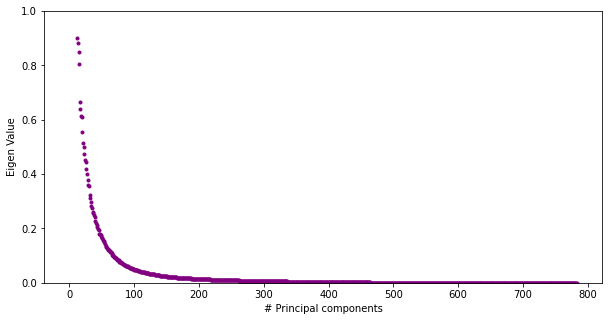

<Figure size 432x288 with 0 Axes>

In [ ]:
M_p, M_p_te = PCA(x_train, x_test, 200)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


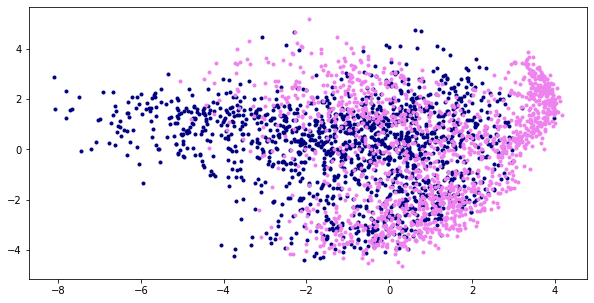

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
b0 = y_train == 0
b1 = y_train == 1
p0 = M_p[b0 == 1, :]
p1 = M_p[b1 == 1, :]
plt.scatter(p0[:,0], p0[:,1], c="navy", marker='.')
plt.scatter(p1[:,0], p1[:,1], c="violet", marker='.')
plt.show()

In [ ]:
from collections import Counter

In [ ]:
# function that caculates the euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
# the k-nearest neighbor class
class KNN:

    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # Compute distances between x and all examples in the training set
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Sort by distance and return indices of the first k neighbors
        k_idx = np.argsort(distances)[:self.k]
        # Get the labels of the k nearest neighbor training samples
        k_neighbor_labels = [self.y_train[i] for i in k_idx]
        # return the most common class label
        most_common = Counter(k_neighbor_labels).most_common(1)
        return most_common[0][0]

In [ ]:
# the nearest centroid class
class NearestCentroid:
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
        self.num_images = len(images)

    def fit(self):
        classes = np.unique(self.labels)
        self.classes = classes

        centroids = np.empty((classes.shape[0], self.images.shape[1]))
        # master list
        label_to_image = []                                     

        for cl in classes:
            # create a list for each class 
            img_label = []                                      
            for j in range(0, self.num_images):
                # if the label equals the picture label
                if self.labels[j] == cl: 
                    # append to list                      
                    img_label.append(self.images[j])
            # append to master list                   
            label_to_image.append(img_label)                    
        # calculate the mean for centroids
        for i in range(0, len(classes)):  
            centroids[i] = np.mean(label_to_image[i], axis=0)
        self.centroids = centroids

    def predict(self, images):
        classified = []
        for image in images:
            smallest_dist = 99999999
            cl = None
            for i, centroid in enumerate(self.centroids):
               # calculate the distance of the picture to each centroid
                dist = np.sqrt(np.sum((image - centroid) ** 2)) 
                if dist < smallest_dist:
                    smallest_dist = dist
                    cl = i
            # append classified picture
            classified.append([cl])                                 

        return classified

In [ ]:
# fucntion that calculates accuracy
def accuracy(y_true, y_pred):
    acc = np.sum(y_true == y_pred) / len(y_true)
    return acc

In [ ]:
start = time.time()

clf_knn=KNN(k=3)
clf_knn.fit(x_train,y_train)
predicts=clf_knn.predict(x_test)
print("k-NN classification accuracy: ", format(accuracy(y_test, predicts) * 100, ".4f"), "%")

end = time.time()
print(end - start)

k-NN classification accuracy:  93.6667 %
19.486527681350708


In [ ]:
start = time.time()


clf_nc = NearestCentroid(x_train, y_train) # call nearest centroid class
# fit the training images and labels
clf_nc.fit()
# predict results with test images
predictions2 = clf_nc.predict(x_test)
  
predictions2 = np.array(predictions2)
predictions2 = predictions2.flatten()

#print("Predictions of nearest centroid: ", predictions2)
# find the accuracy using predicitions and test labels at a scale of 100
print("Nearest Centroid classification accuracy: ", format(accuracy(y_test, predictions2)*100, ".4f"), "%")

end = time.time()
print(end - start)

Nearest Centroid classification accuracy:  80.3333 %
0.02954411506652832


In [ ]:
def distance(x1, x2):
  return np.linalg.norm(x1-x2)

In [ ]:
# function for random selection of centroids for RBF
def random(X, k):
    return X[np.random.choice(X.shape[0], k, replace=False)], [np.std(x) for x in X]

In [ ]:
# function of k means for selection of centroids for RBF
def kmeans(X, k, max_iters=20):
    centroids = X[np.random.choice(range(len(X)), k, replace=False)

    converged = False
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  
            distances_list = []
            for c in centroids:
                distances_list.append(distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids),  [np.std(x) for x in cluster_list]


In [ ]:
class RBF:

    def __init__(self, X, y, testX, testy, classes_n, k, method=kmeans, std_from_clusters=True):
        self.X = X
        self.y = y

        self.testX = testX
        self.testy = testy

        self.classes_n = classes_n
        self.k = k
        self.method = method
        self.std_from_clusters = std_from_clusters

    # convert labels to hot encoding
    def hot_encoding(self, x, classes_n):
        arr = np.zeros((len(x), classes_n))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    # rbf function
    def get_rbf(self, x, c, sigma):
        distance_r = distance(x, c)
        return 1 / np.exp(-distance_r / sigma ** 2)

    # get the rbf of input x
    def get_rbf_as_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.get_rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)

    def fit(self):
        # get the centroids
        
        self.centroids, self.std_list = self.method(self.X, self.k)
        
        if not self.std_from_clusters:
          dMax = np.max([distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
          self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)
        
        # set rbf of input as the list of centroids
        RBF_X = self.get_rbf_as_list(self.X, self.centroids, self.std_list)
        # find weight
        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.hot_encoding(self.y, self.classes_n)
        # get rbf of test data as list of centroids
        RBF_list_tst = self.get_rbf_as_list(self.testX, self.centroids, self.std_list)
        # find predicted labels of test
        self.pred_testy = RBF_list_tst @ self.w
        # get the one with the biggest predicted probability
        self.pred_testy = np.array([np.argmax(x) for x in self.pred_testy])
        # find the difference between predicted and actual labels
        diff = self.pred_testy - self.testy
        # print accuracy
        print('Accuracy: ', len(np.where(diff == 0)[0]) / len(diff))


In [ ]:
#rbf for train
start = time.time()
RBF_CLASSIFIER = RBF(x_train, y_train, x_train, y_train, classes_n=2,
                     k=2, method=random, std_from_clusters=False)

rbf_pred = RBF_CLASSIFIER.fit()

end = time.time()
print(end - start)

Accuracy:  0.698
0.24852418899536133


In [ ]:
#rbf for test
start = time.time()
RBF_CLASSIFIER = RBF(x_train, y_train, x_test, y_test, classes_n=2,
                     k=2, method=random, std_from_clusters=False)

rbf_pred = RBF_CLASSIFIER.fit()

end = time.time()
print(end - start)

Accuracy:  0.52
0.1778411865234375
